# Library

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Passo 1: Captura dos Dados

In [91]:
# Definindo caminho para os arquivos
path = "data/raw/"

files = [
    #"OcorrenciaMensal(Criminal)-Lins_20240518_144046.xlsx",
    "OcorrenciaMensal(Criminal)-Lins_20240518_144147.xlsx",
    #"OcorrenciaMensal(Criminal)-Lins_20240518_144203.xlsx",
    #"OcorrenciaMensal(Criminal)-Lins_20240518_144207.xlsx",
    #"OcorrenciaMensal(Criminal)-Lins_20240518_144212.xlsx",
]

In [92]:
# Carregando os dados para DataFrames
dfs = []

for file in files:
    df = pd.read_excel(path + file)
    dfs.append(df)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [93]:
# Concatenando os DataFrames
df_total = pd.concat(dfs, ignore_index=True)

In [94]:
# Verificando os dados carregados
df_total.head()

,Natureza,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
0,HOMICÍDIO DOLOSO (2),0,0,1,0,2,0,0,0,0,0,0,0,3.0
1,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO (3),0,0,1,0,2,0,0,0,0,0,0,0,3.0
2,HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE...,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,HOMICÍDIO CULPOSO POR ACIDENTE DE TRÂNSITO,0,0,1,2,0,1,1,0,1,1,0,2,9.0


In [95]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Natureza   23 non-null     object 
 1   Janeiro    23 non-null     int64  
 2   Fevereiro  23 non-null     int64  
 3   Marco      23 non-null     int64  
 4   Abril      23 non-null     int64  
 5   Maio       23 non-null     int64  
 6   Junho      23 non-null     int64  
 7   Julho      23 non-null     int64  
 8   Agosto     23 non-null     int64  
 9   Setembro   23 non-null     int64  
 10  Outubro    23 non-null     int64  
 11  Novembro   23 non-null     int64  
 12  Dezembro   23 non-null     int64  
 13  Total      23 non-null     float64
dtypes: float64(1), int64(12), object(1)
memory usage: 2.6+ KB


# Passo 2: Processamento dos Dados


In [ ]:
# Carregando o DataFrame
# Assumindo que o DataFrame 'df_total' foi criado no passo anterior

# Limpando os Dados
# Removendo Colunas Irrelevantes
df_total = df_total.drop(columns=["Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO", "Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO", "Nº DE VÍTIMAS EM LATROCÍNIO"])

KeyError: "['Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO', 'Nº DE VÍTIMAS EM HOMICÍDIO DOLOSO POR ACIDENTE DE TRÂNSITO', 'Nº DE VÍTIMAS EM LATROCÍNIO'] not found in axis"

In [96]:
# Renomeando Colunas
df_total = df_total.rename(columns={"TOTAL DE ESTUPRO (4)": "TOTAL_ESTUPRO", "TOTAL DE ROUBO - OUTROS (1)": "TOTAL_ROUBO_OUTROS", "HOMICÍDIO DOLOSO (2)": "HOMICIDIO_DOLOSO"})

In [97]:
# Substituindo Caracteres Especiais
df_total = df_total.replace(",", ".", regex=True)

In [98]:
# Convertendo Tipos de Dados
df_total = df_total.apply(pd.to_numeric, errors='coerce')

In [78]:
# Verificando a presença de valores faltantes
df_total.isnull().sum()

Natureza     23
Janeiro       0
Fevereiro     0
Marco         0
Abril         0
Maio         23
Junho        23
Julho        23
Agosto       23
Setembro     23
Outubro      23
Novembro     23
Dezembro     23
Total         0
dtype: int64

In [99]:
# Tratando Valores Faltantes
# Substituindo por Zero
df_total = df_total.fillna(0)

In [100]:
# Substituindo valores NaN por 0 na coluna 'Natureza' e convertendo para int
df_total['Natureza'] = df_total['Natureza'].fillna(0).astype(int)


In [101]:
# Verificando valores únicos na coluna 'Natureza'
df_total['Natureza'].unique()


array([0])

In [ ]:
# Criando Coluna de Ano
df_total["Ano"] = 2024  # Assumindo que todos os dados são de 2024

In [102]:
# Salvando o DataFrame Processado
df_total.to_csv("data/processed/dados_limpos.csv", index=False)

# Passo 3: Transformação dos Dados


In [103]:
# Exibindo estatísticas descritivas do DataFrame
df_total.describe()


,Natureza,Janeiro,Fevereiro,Marco,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro,Total
count,23.0,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,0.0,8.260870,7.043478,8.260870,6.913043,8.521739,6.304348,6.391304,8.043478,7.956522,7.608696,6.695652,9.043478,43.048043
std,0.0,26.186772,20.233811,20.374265,16.456314,20.902087,16.496376,16.612534,21.990656,21.278410,18.142715,16.501886,26.990703,93.391682
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.052500
50%,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,0.0,2.000000,2.500000,5.500000,3.500000,6.000000,3.500000,4.000000,2.500000,2.500000,5.500000,5.000000,4.000000,22.500000
max,0.0,123.000000,95.000000,95.000000,70.000000,97.000000,76.000000,76.000000,100.000000,93.000000,77.000000,75.000000,128.000000,379.000000


In [104]:
# Carregando o DataFrame
# Assumindo que o DataFrame 'df_total' foi processado nos passos anteriores
df_total = pd.read_csv("data/processed/dados_limpos.csv")

In [105]:
# Criando Novas Variáveis
# Criando Colunas de Trimestre
df_total['Total_Primeiro_Trimestre'] = df_total['Janeiro'] + df_total['Fevereiro'] + df_total['Marco']
df_total['Total_Segundo_Trimestre'] = df_total['Abril'] + df_total['Maio'] + df_total['Junho']
df_total['Total_Terceiro_Trimestre'] = df_total['Julho'] + df_total['Agosto'] + df_total['Setembro']
df_total['Total_Quarto_Trimestre'] = df_total['Outubro'] + df_total['Novembro'] + df_total['Dezembro']

In [106]:
# Criando Coluna de Total de Ocorrências
df_total['Total_Ocorrencias'] = df_total.iloc[:, 1:14].sum(axis=1)

In [107]:
# Categorizando Dados
# Criando Colunas Categóricas
df_total['Categoria_Crime'] = 'Outros'

In [108]:
# Definindo categorias de crimes
crimes_violentos = ['HOMICIDIO_DOLOSO', 'TENTATIVA DE HOMICÍDIO', 'LESÃO CORPORAL DOLOSA', 'LESÃO CORPORAL SEGUIDA DE MORTE', 'LATROCÍNIO', 'TOTAL_ESTUPRO']
crimes_patrimoniais = ['ROUBO - OUTROS', 'ROUBO DE VEÍCULO', 'ROUBO A BANCO', 'ROUBO DE CARGA', 'FURTO - OUTROS', 'FURTO DE VEÍCULO']

In [109]:
# Definindo mapeamento de códigos para categorias de crimes
crime_codes = {
    'crimes_violentos': [1, 2, 3],  # Substitua pelos códigos reais
    'crimes_patrimoniais': [4, 5, 6]  # Substitua pelos códigos reais
}

# Adicionando uma classificação padrão para valores não mapeados
for index, row in df_total.iterrows():
    natureza = row['Natureza']
    if natureza in crime_codes['crimes_violentos']:
        df_total.loc[index, 'Categoria_Crime'] = 'Crimes Violentos'
    elif natureza in crime_codes['crimes_patrimoniais']:
        df_total.loc[index, 'Categoria_Crime'] = 'Crimes Patrimoniais'
    else:
        df_total.loc[index, 'Categoria_Crime'] = 'Outros'


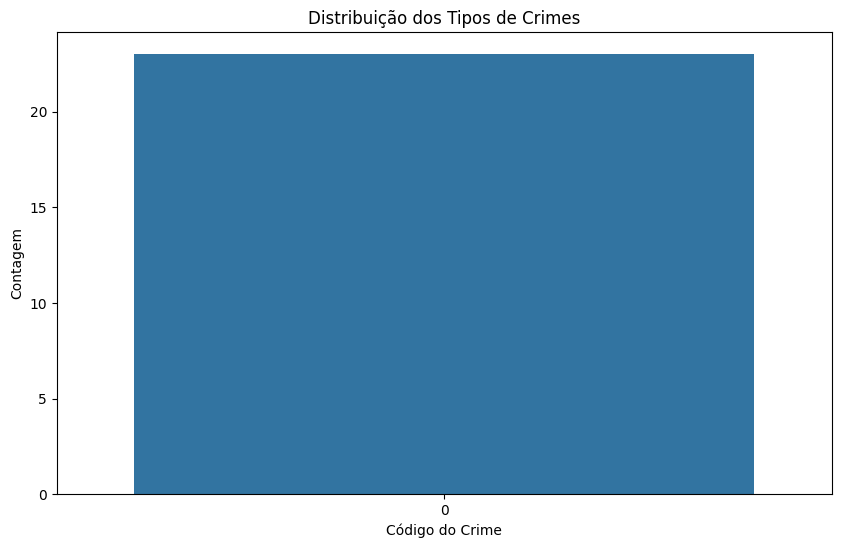

In [110]:
# Visualização da distribuição das categorias de crimes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_total, x='Natureza')
plt.title('Distribuição dos Tipos de Crimes')
plt.xlabel('Código do Crime')
plt.ylabel('Contagem')
plt.show()


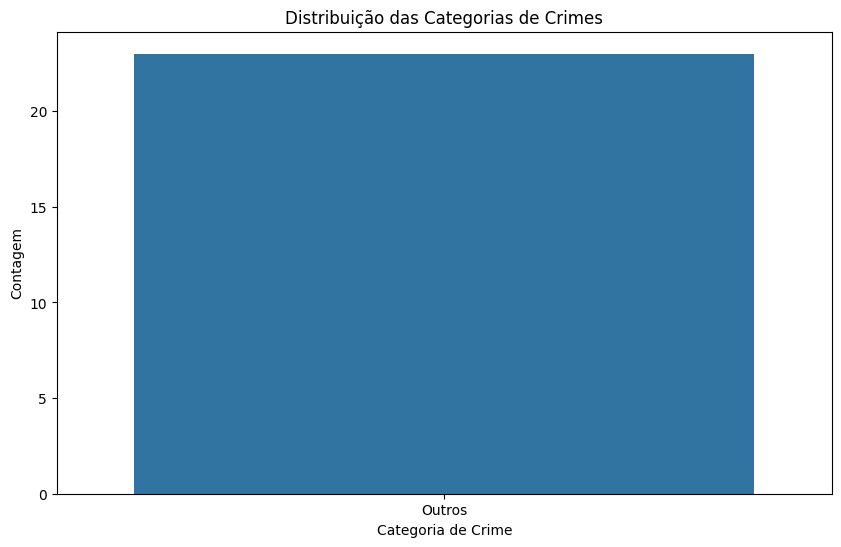

In [111]:
# Visualização da distribuição das categorias de crimes
plt.figure(figsize=(10, 6))
sns.countplot(data=df_total, x='Categoria_Crime')
plt.title('Distribuição das Categorias de Crimes')
plt.xlabel('Categoria de Crime')
plt.ylabel('Contagem')
plt.show()


In [ ]:
# Classificando os crimes
for index, row in df_total.iterrows():
    if any(crime in row['Natureza'] for crime in crimes_violentos):
        df_total.loc[index, 'Categoria_Crime'] = 'Crimes Violentos'
    elif any(crime in row['Natureza'] for crime in crimes_patrimoniais):
        df_total.loc[index, 'Categoria_Crime'] = 'Crimes Patrimoniais'

TypeError: argument of type 'float' is not iterable

In [112]:
# Criando coluna com a categoria resumida
df_total['Categoria_Crime_Resumida'] = df_total['Categoria_Crime'].apply(lambda x: x.split()[0] if x != 'Outros' else x)

In [113]:
# Salvando o DataFrame Transformado
df_total.to_csv("data/processed/dados_transformados.csv", index=False)

# Passo 4: Análise Exploratória dos Dados

In [59]:
# Carregando o DataFrame
# Assumindo que o DataFrame 'df_total' foi transformado nos passos anteriores
df_total = pd.read_csv("data/processed/dados_transformados.csv")

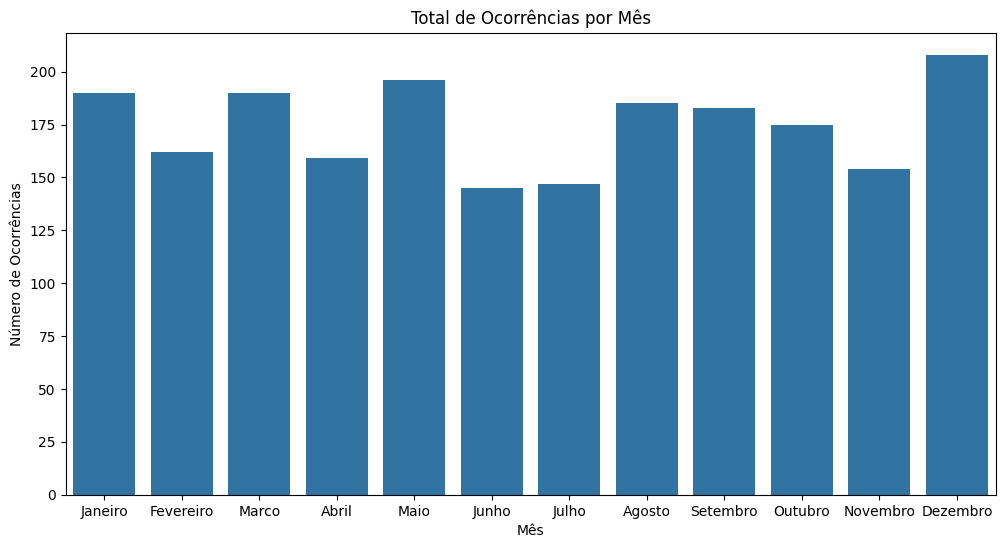

In [114]:
# Analisando Distribuição de Ocorrências
# Total de Ocorrências por Mês
plt.figure(figsize=(12, 6))
sns.barplot(x=df_total.columns[1:13], y=df_total.iloc[:, 1:13].sum())
plt.title("Total de Ocorrências por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Ocorrências")
plt.show()

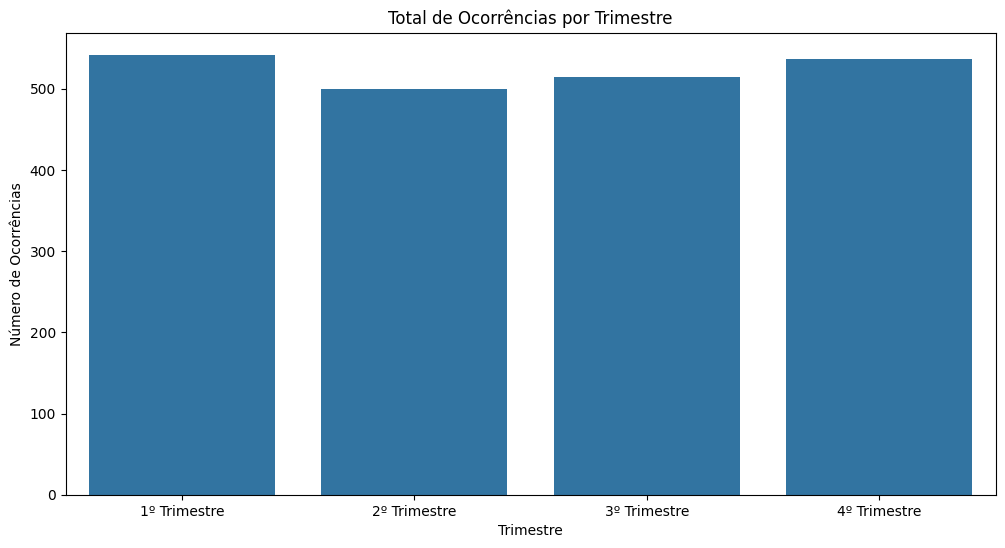

In [115]:
# Total de Ocorrências por Trimestre
plt.figure(figsize=(12, 6))
sns.barplot(x=['1º Trimestre', '2º Trimestre', '3º Trimestre', '4º Trimestre'],
           y=[df_total['Total_Primeiro_Trimestre'].sum(), df_total['Total_Segundo_Trimestre'].sum(),
              df_total['Total_Terceiro_Trimestre'].sum(), df_total['Total_Quarto_Trimestre'].sum()])
plt.title("Total de Ocorrências por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Número de Ocorrências")
plt.show()

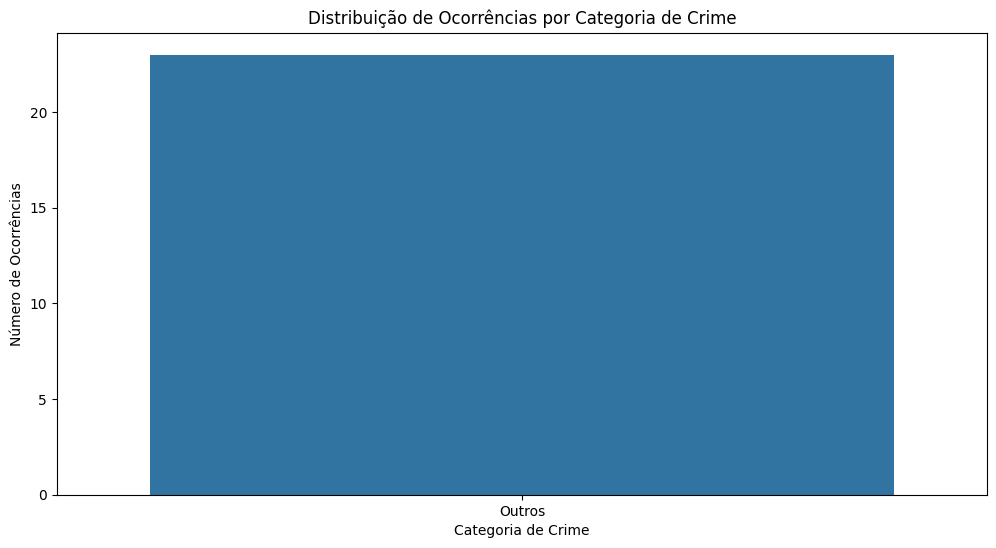

In [116]:
# Distribuição de Ocorrências por Categoria
plt.figure(figsize=(12, 6))
sns.countplot(x='Categoria_Crime_Resumida', data=df_total)
plt.title("Distribuição de Ocorrências por Categoria de Crime")
plt.xlabel("Categoria de Crime")
plt.ylabel("Número de Ocorrências")
plt.show()

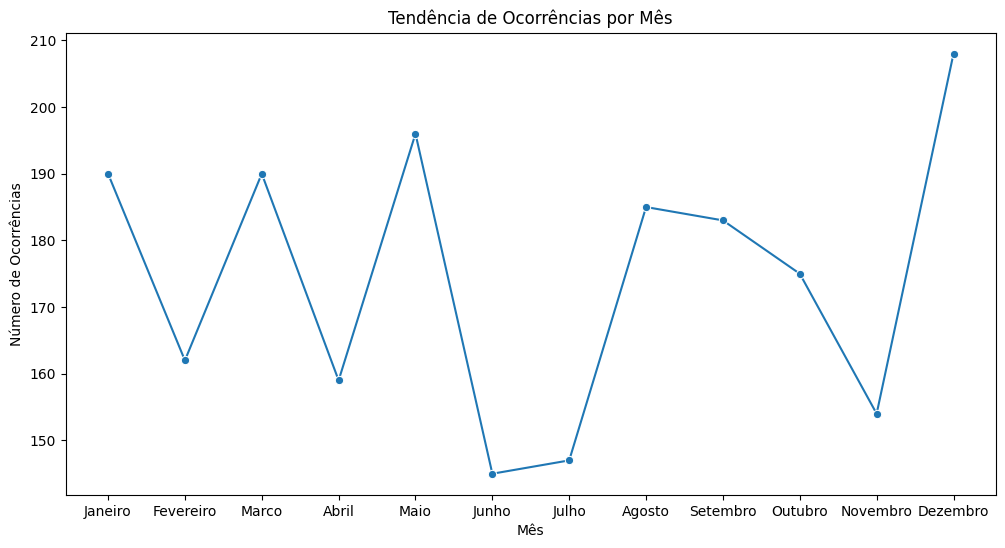

In [117]:
# Analisando Tendências ao Longo do Ano
# Tendência de Ocorrências por Mês
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_total.columns[1:13], y=df_total.iloc[:, 1:13].sum(), marker='o')
plt.title("Tendência de Ocorrências por Mês")
plt.xlabel("Mês")
plt.ylabel("Número de Ocorrências")
plt.show()

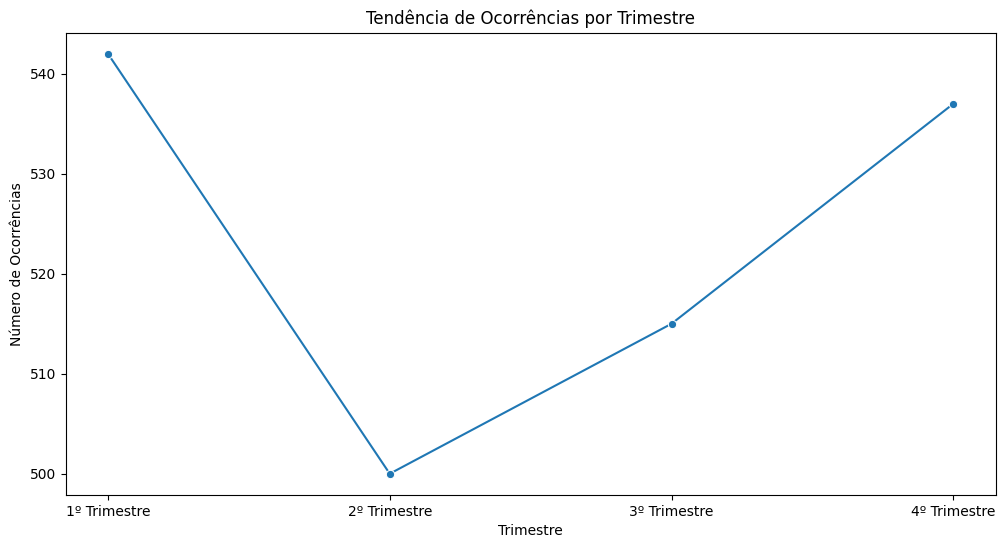

In [118]:
# Tendência de Ocorrências por Trimestre
plt.figure(figsize=(12, 6))
sns.lineplot(x=['1º Trimestre', '2º Trimestre', '3º Trimestre', '4º Trimestre'],
           y=[df_total['Total_Primeiro_Trimestre'].sum(), df_total['Total_Segundo_Trimestre'].sum(),
              df_total['Total_Terceiro_Trimestre'].sum(), df_total['Total_Quarto_Trimestre'].sum()], marker='o')
plt.title("Tendência de Ocorrências por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Número de Ocorrências")
plt.show()

In [119]:
# Analisando Correlação entre Variáveis
# Matriz de Correlação
plt.figure(figsize=(12, 6))
correlation_matrix = df_total.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

ValueError: could not convert string to float: 'Outros'

<Figure size 1200x600 with 0 Axes>

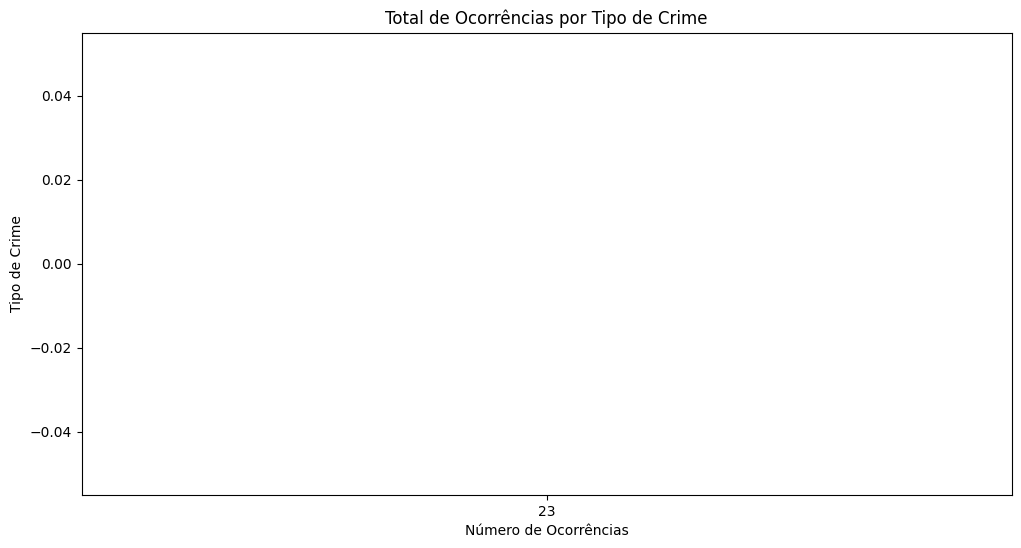

In [120]:
# Analisando Ocorrências por Tipo de Crime
# Total de Ocorrências por Tipo de Crime
plt.figure(figsize=(12, 6))
sns.barplot(y=df_total['Natureza'].value_counts().index, x=df_total['Natureza'].value_counts().values)
plt.title("Total de Ocorrências por Tipo de Crime")
plt.xlabel("Número de Ocorrências")
plt.ylabel("Tipo de Crime")
plt.show()

# Passo 5: Interpretação, Avaliação e Conhecimento

In [67]:
# Carregando o DataFrame
# Assumindo que o DataFrame 'df_total' foi transformado nos passos anteriores
df_total = pd.read_csv("data/processed/dados_transformados.csv")

In [121]:
# Interpretação dos Resultados da Análise Exploratória
# Observação:
# - Tendências: Observar as tendências de ocorrências por mês e por trimestre pode identificar períodos com maior risco de criminalidade.
# - Correlação: Analisar a matriz de correlação pode revelar se há relação entre diferentes tipos de crime ou entre crimes e variáveis como mês do ano ou trimestre.
# - Distribuição: A análise da distribuição de ocorrências por categoria de crime revela os tipos de crimes mais frequentes na cidade.

# Teste de Hipóteses
# Hipótese: O número de ocorrências é maior no segundo trimestre do ano.
# Teste: Utilizar o teste t para amostras independentes para comparar o número de ocorrências no segundo trimestre com a média do número de ocorrências nos outros trimestres.
segundo_trimestre = df_total['Total_Segundo_Trimestre']
outros_trimestres = df_total[['Total_Primeiro_Trimestre', 'Total_Terceiro_Trimestre', 'Total_Quarto_Trimestre']].sum(axis=1)
t_statistic, p_value = stats.ttest_ind(segundo_trimestre, outros_trimestres)
print(f"Estatística t: {t_statistic}")
print(f"Valor p: {p_value}")

Estatística t: -1.1750992924982941
Valor p: 0.24627503780293503


In [122]:
# Conclusões:
# Se o valor p for menor que o nível de significância (por exemplo, 0.05), rejeitamos a hipótese nula e concluímos que o número de ocorrências é maior no segundo trimestre.

# Modelagem Preditiva
# Objetivo: Criar um modelo de regressão linear para prever o número total de ocorrências em cada mês, com base nos dados históricos.
# Variáveis: Utilizar as colunas do DataFrame que representam os meses (Janeiro a Dezembro) como variáveis explicativas e a coluna "Total_Ocorrencias" como variável resposta.
X = df_total.iloc[:, 1:13]
y = df_total['Total_Ocorrencias']
model = LinearRegression()
model.fit(X, y)
previsoes = model.predict(X)
print(f"R²: {model.score(X, y)}")

R²: 0.999923329549456


ValueError: x and y must have same first dimension, but have shapes (12,) and (23,)

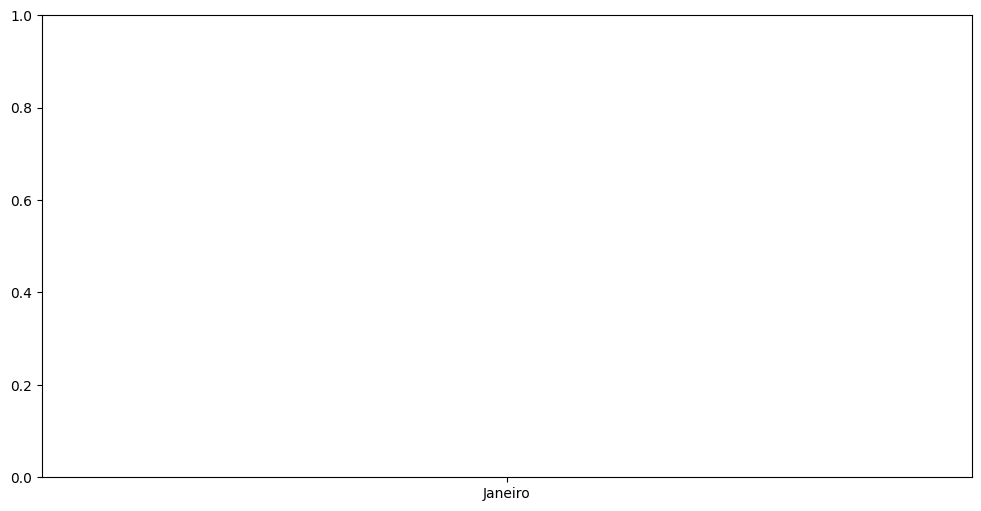

In [123]:
# Visualizar as previsões e os dados reais
plt.figure(figsize=(12, 6))
plt.plot(df_total.columns[1:13], y, label="Dados Reais")
plt.plot(df_total.columns[1:13], previsoes, label="Previsões")
plt.title("Previsões de Ocorrências")
plt.xlabel("Mês")
plt.ylabel("Número de Ocorrências")
plt.legend()
plt.show()

In [124]:
# Clusterização
# Objetivo: Identificar áreas com maior concentração de crimes, utilizando dados de localização (se disponível) e a coluna "Total_Ocorrencias".
# Variáveis: Se os dados de localização forem disponíveis, utilizar as coordenadas geográficas (latitude e longitude). Caso contrário, utilizar o total de ocorrências por mês ou trimestre como proxy para a localização.
# Assumindo que a coluna 'Latitude' e 'Longitude' estão disponíveis
X = df_total[['Latitude', 'Longitude']]

KeyError: "None of [Index(['Latitude', 'Longitude'], dtype='object')] are in the [columns]"

In [125]:
# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [126]:
# Criar o modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=0)

In [127]:
# Treinar o modelo
kmeans.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [128]:
# Obter os clusters
clusters = kmeans.labels_

In [129]:
# Visualizar os clusters
plt.figure(figsize=(12, 6))
plt.scatter(X['Latitude'], X['Longitude'], c=clusters, cmap='viridis')
plt.title("Clusters de Ocorrências")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

# Analisar as características dos clusters:
# - Comparar o número de ocorrências em cada cluster.
# - Investigar o tipo de crime predominante em cada cluster.
# - Analisar se os clusters coincidem com áreas específicas da cidade.

KeyError: 'Latitude'

<Figure size 1200x600 with 0 Axes>